In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as mth
import matplotlib.patches as patches
from scipy import stats as st
plt.rcParams.update( {'figure.max_open_warning':0} )

from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

In [ ]:
salaries = pd.read_csv('/datasets/salaries.csv')

In [ ]:
salaries.head()

,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
salaries.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 277.1 KB


In [ ]:
salaries.describe().T

,count,mean,std,min,25%,50%,75%,max
id,607.0,303.000000,1.753701e+02,0.0,151.5,303.0,454.5,606.0
work_year,607.0,2021.405272,6.921330e-01,2020.0,2021.0,2022.0,2022.0,2022.0
salary,607.0,324000.062603,1.544357e+06,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_in_usd,607.0,112297.869852,7.095726e+04,2859.0,62726.0,101570.0,150000.0,600000.0
remote_ratio,607.0,70.922570,4.070913e+01,0.0,50.0,100.0,100.0,100.0


In [ ]:
salaries.isna().sum()

id                    0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
work_year = 1 - len(salaries['work_year'].dropna()) / len(salaries)
employment_type = 1 - len(salaries['employment_type'].dropna()) / len(salaries)
experience_level = 1 - len(salaries['experience_level'].dropna()) / len(salaries)

print('Доля пропущенных значений:\nwork_year - {:.2%},\nemployment_type - {:.2%},\nexperience_level - {:.2%}'.format(work_year,
                                                                                                                     employment_type,
                                                                                                                     experience_level))

Доля пропущенных значений:
work_year - 0.00%,
employment_type - 0.00%,
experience_level - 0.00%


In [ ]:
salaries.dropna(subset=['work_year'], inplace = True, axis = 0)
salaries.dropna(subset=['employment_type'], inplace = True, axis = 0)
salaries.dropna(subset=['experience_level'], inplace = True, axis = 0)

In [ ]:
salaries.columns

Index(['id', 'work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
salaries.duplicated().sum()

0

In [ ]:
int_types = ['int8', 'uint8', 'int16', 'uint16', 'int32', 'uint32']
for it in int_types:
  print(np.iinfo(it))

Machine parameters for int8
---------------------------------------------------------------
min = -128
max = 127
---------------------------------------------------------------

Machine parameters for uint8
---------------------------------------------------------------
min = 0
max = 255
---------------------------------------------------------------

Machine parameters for int16
---------------------------------------------------------------
min = -32768
max = 32767
---------------------------------------------------------------

Machine parameters for uint16
---------------------------------------------------------------
min = 0
max = 65535
---------------------------------------------------------------

Machine parameters for int32
---------------------------------------------------------------
min = -2147483648
max = 2147483647
---------------------------------------------------------------

Machine parameters for uint32
-------------------------------------------------------------

In [ ]:
salaries.info(memory_usage = "deep")
salaries.memory_usage(deep = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 281.7 KB


Index                  4856
id                     4856
work_year              4856
experience_level      35813
employment_type       35813
job_title             44468
salary                 4856
salary_currency       36420
salary_in_usd          4856
employee_residence    35813
remote_ratio           4856
company_location      35813
company_size          35206
dtype: int64

In [ ]:
def mem_usage(pandas_obj):
  if isinstance(pandas_obj, pd.DataFrame):
    usage_b = pandas_obj.memory_usage(deep = True).sum()
  else:
    usage_b = pandas_obj.memory_usage(deep = True)
  usage_kb = usage_b / 1024
  return "{:03.2f} KB".format(usage_kb)

In [ ]:
df_int = salaries.select_dtypes(include = ['int'])
converted_int = df_int.apply(pd.to_numeric, downcast = 'unsigned')

print(mem_usage(df_int))
print(mem_usage(converted_int))

compare_ints = pd.concat([df_int.dtypes, converted_int.dtypes], axis = 1)
compare_ints.columns = ['before', 'after']
compare_ints.apply(pd.Series.value_counts)

28.45 KB
12.45 KB


,before,after
uint8,NaN,1.0
uint16,NaN,2.0
uint32,NaN,2.0
int64,5.0,NaN


In [ ]:
df_float = salaries.select_dtypes(include = ['float'])
converted_float = df_float.apply(pd.to_numeric, downcast = 'unsigned')

print(mem_usage(df_float))
print(mem_usage(converted_float))

compare_floats = pd.concat([df_float.dtypes, converted_float.dtypes], axis = 1)
compare_floats.columns = ['before', 'after']
compare_floats.apply(pd.Series.value_counts)

4.74 KB
4.74 KB


,before,after


In [ ]:
optimized_salaries = salaries.copy()
optimized_salaries[converted_int.columns] = converted_int
optimized_salaries[converted_float.columns] = converted_float

print(mem_usage(salaries))
print(mem_usage(optimized_salaries))

281.72 KB
265.72 KB


In [ ]:
df_object = salaries.select_dtypes(include = ['object'])
df_object.describe().T

,count,unique,top,freq
experience_level,607,4,SE,280
employment_type,607,4,FT,588
job_title,607,50,Data Scientist,143
salary_currency,607,17,USD,398
employee_residence,607,57,US,332
company_location,607,50,US,355
company_size,607,3,M,326


In [ ]:
converted_object = pd.DataFrame()
for col in df_object:
  num_unique_values = len(salaries[col].unique())
  num_total_values = len(salaries[col])
  if num_unique_values / num_total_values < 0.5:
    converted_object.loc[:, col] = salaries[col].astype('category')
  else:
    converted_object.loc[:, col] = salaries[col]

print(mem_usage(df_object))
print(mem_usage(converted_object))

compare_objects = pd.concat([df_object.dtypes, converted_object.dtypes], axis = 1)
compare_objects.columns = ['before', 'after']
compare_objects.apply(pd.Series.value_counts)

258.01 KB
27.63 KB


,before,after
object,7.0,NaN
category,NaN,1.0
category,NaN,1.0
category,NaN,1.0
category,NaN,1.0
category,NaN,1.0
category,NaN,1.0
category,NaN,1.0


In [ ]:
optimized_salaries[converted_object.columns] = converted_object

print(mem_usage(salaries))
print(mem_usage(optimized_salaries))

compare_df = pd.concat([salaries.dtypes, optimized_salaries.dtypes], axis = 1)
compare_df.columns = ['before', 'after']
compare_df.apply(pd.Series.value_counts)

salaries = optimized_salaries

281.72 KB
35.34 KB


In [ ]:
salaries.info(memory_usage = 'deep')

del salaries['id']

salaries.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  607 non-null    uint16  
 1   work_year           607 non-null    uint16  
 2   experience_level    607 non-null    category
 3   employment_type     607 non-null    category
 4   job_title           607 non-null    category
 5   salary              607 non-null    uint32  
 6   salary_currency     607 non-null    category
 7   salary_in_usd       607 non-null    uint32  
 8   employee_residence  607 non-null    category
 9   remote_ratio        607 non-null    uint8   
 10  company_location    607 non-null    category
 11  company_size        607 non-null    category
dtypes: category(7), uint16(2), uint32(2), uint8(1)
memory usage: 35.3 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column     

In [ ]:
salaries.sample(24)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
362,2022,SE,FT,Data Analyst,130000,USD,130000,CA,100,CA,M
339,2022,SE,FT,Data Analyst,109280,USD,109280,US,100,US,M
445,2022,MI,FT,Data Engineer,70000,EUR,76940,GR,100,GR,M
479,2022,MI,FT,Data Scientist,120000,USD,120000,US,100,US,M
480,2022,SE,FT,Machine Learning Engineer,120000,USD,120000,AE,100,AE,S
591,2022,SE,FT,Data Architect,144854,USD,144854,US,100,US,M
121,2021,SE,FT,Principal Data Engineer,200000,USD,200000,US,100,US,M
229,2021,SE,FT,Data Analyst,90000,CAD,71786,CA,100,CA,M
582,2022,SE,FT,Data Engineer,220110,USD,220110,US,100,US,M
183,2021,SE,FT,Finance Data Analyst,45000,GBP,61896,GB,50,GB,L


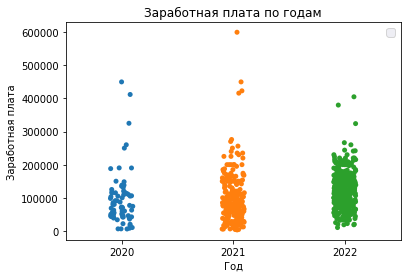

In [ ]:
sns.stripplot(x='work_year', y='salary_in_usd', data=salaries)
sns.set_theme(style='darkgrid', palette='deep')
plt.title('Заработная плата по годам')
plt.xlabel('Год')
plt.ylabel('Заработная плата')
plt.legend('')

Text(0, 0.5, 'Количество сотрудников')

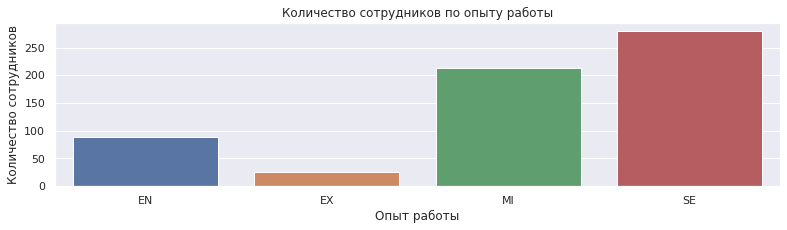

In [ ]:
salaries_company_location = salaries.pivot_table(index='experience_level',
                                                 values='salary_in_usd',
                                                 aggfunc='count')
plt.figure(figsize=(13,3))
sns.barplot(x = salaries_company_location.index, y = salaries_company_location['salary_in_usd'])
plt.title('Количество сотрудников по опыту работы')
plt.xlabel('Опыт работы')
plt.ylabel('Количество сотрудников')

In [ ]:
salaries_company_location

,salary_in_usd
experience_level,
EN,88
EX,26
MI,213
SE,280
